In [1]:
# ! wget http://www.yellowstone.solutions/thredds/fileServer/daily_or_monthly/monthly/v2_2018_soil_water_monthly.nc4

In [2]:
! ls

00-examine-soil-monthly-output-using-netcdf-tools.ipynb
00-examine-soil-monthly-output.ipynb
v2_2018_soil_water_monthly.nc4


# Reference

https://nbviewer.jupyter.org/urls/bitbucket.org/salishsea/tools/raw/tip/analysis_tools/Exploring%20netCDF%20Files.ipynb

In [3]:
import netCDF4 as nc
import numpy as np

from salishsea_tools import nc_tools

In [4]:
! pip install --user SalishSea_Tools

  ERROR: Could not find a version that satisfies the requirement SalishSea_Tools (from versions: none)
ERROR: No matching distribution found for SalishSea_Tools


https://www.perforce.com/blog/vcs/git-vs-mercurial-how-are-they-different

In [5]:
! pip install --user mercurial

In [6]:
! hg --help

Mercurial Distributed SCM

list of commands:

 add           add the specified files on the next commit
 addremove     add all new files, delete all missing files
 annotate      show changeset information by line for each file
 archive       create an unversioned archive of a repository revision
 backout       reverse effect of earlier changeset
 bisect        subdivision search of changesets
 bookmarks     create a new bookmark or list existing bookmarks
 branch        set or show the current branch name
 branches      list repository named branches
 bundle        create a bundle file
 cat           output the current or given revision of files
 clone         make a copy of an existing repository
 commit        commit the specified files or all outstanding changes
 config        show combined config settings from all hgrc files
 copy          mark files as copied for the next commit
 diff          diff repository (or selected files)
 export        dump the header and diffs for one or 

In [7]:
#! (cd ~/opt; hg -y clone ssh://tonybutzer@bitbucket.org/salishsea/tools)

In [8]:
! (cd /opt/tools/SalishSeaTools; pip install --user .)

Processing /opt/tools/SalishSeaTools
  Stored in directory: /tmp/pip-ephem-wheel-cache-vcyubuur/wheels/d3/41/4a/4329a5791188a2e458a18c436531efedf60402e002f3c0a6bb
Successfully built SalishSeaTools
  Found existing installation: SalishSeaTools 2.0
    Uninstalling SalishSeaTools-2.0:
      Successfully uninstalled SalishSeaTools-2.0


In [9]:
from salishsea_tools import nc_tools

In [10]:
grid = nc.Dataset('v2_2018_soil_water_monthly.nc4')

In [11]:
nc_tools.show_dimensions(grid)

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 7814
<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 8075
<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 12
<class 'netCDF4._netCDF4.Dimension'>: name = 'nv', size = 2


In [12]:
nc_tools.show_variables(grid)

dict_keys(['x', 'y', 'lat', 'lon', 'time', 'timeunit', 'time_bnds', 'lambert_conformal_conic', 'soil_water'])


In [13]:


nc_tools.show_dataset_attrs(grid)


file format: NETCDF4
Conventions: CF-1.6
history: Wed Jun 12 15:32:06 2019: ncatted -O -a units,time,o,c,months since 1980-01-01 v2_2018_soil_water_monthly.nc4
Wed Jun 12 15:32:06 2019: ncatted -O -a Conventions,global,o,c,CF-1.6 v2_2018_soil_water_monthly.nc4
Wed Jun 12 15:29:51 2019: ncatted -O -a units,time,o,c,months since 1980-01-01 v2_2018_soil_water_monthly.nc4
Wed Jun 12 15:29:51 2019: ncatted -O -a Conventions,global,o,c,CF-1.6 v2_2018_soil_water_monthly.nc4
Wed Jun 12 15:28:57 2019: ncatted -O -a units,time,o,c,months since 1980-01-01 v2_2018_soil_water_monthly.nc4
Wed Jun 12 15:28:57 2019: ncatted -O -a Conventions,global,o,c,CF-1.6 v2_2018_soil_water_monthly.nc4


In [14]:
nc_tools.show_variable_attrs(grid, 'lon')

<class 'netCDF4._netCDF4.Variable'>
float32 lon(y, x)
    units: degrees_east
    long_name: lon
    standard_name: longitude
unlimited dimensions: 
current shape = (8075, 7814)
filling on, default _FillValue of 9.969209968386869e+36 used


In [15]:
nc_tools.show_variable_attrs(grid)

<class 'netCDF4._netCDF4.Variable'>
float32 x(x)
    units: m
    long_name: x
    standard_name: projection_x_coordinate
unlimited dimensions: 
current shape = (7814,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 y(y)
    units: m
    long_name: y
    standard_name: projection_y_coordinate
unlimited dimensions: 
current shape = (8075,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lat(y, x)
    units: degrees_north
    long_name: lat
    standard_name: latitude
unlimited dimensions: 
current shape = (8075, 7814)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lon(y, x)
    units: degrees_east
    long_name: lon
    standard_name: longitude
unlimited dimensions: 
current shape = (8075, 7814)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    lon

In [16]:
lons = grid.variables['lon']
lons

<class 'netCDF4._netCDF4.Variable'>
float32 lon(y, x)
    units: degrees_east
    long_name: lon
    standard_name: longitude
unlimited dimensions: 
current shape = (8075, 7814)
filling on, default _FillValue of 9.969209968386869e+36 used

In [17]:
lats = grid.variables['lat']
lats

<class 'netCDF4._netCDF4.Variable'>
float32 lat(y, x)
    units: degrees_north
    long_name: lat
    standard_name: latitude
unlimited dimensions: 
current shape = (8075, 7814)
filling on, default _FillValue of 9.969209968386869e+36 used

In [18]:
soil = grid.variables['soil_water']
soil

<class 'netCDF4._netCDF4.Variable'>
float32 soil_water(time, y, x)
    _FillValue: -9999.0
    long_name: soil_water
    units: mm
    missing_value: -9999.0
    coordinates: lat lon
    grid_mapping: lambert_conformal_conic
    cell_methods: area: mean time: minimum
unlimited dimensions: 
current shape = (12, 8075, 7814)
filling on

In [19]:
soil.units

'mm'

In [20]:
#soil.valid_range

In [21]:
lats.shape

(8075, 7814)

In [22]:
print('Latitudes and longitudes of domain corners:')
pt = (0, 0)
print('  0, 0:        ', lats[pt], lons[pt])
pt = (0, lats.shape[1] - 1)
print('  0, x-max:    ', lats[pt], lons[pt])
pt = (lats.shape[0] - 1, 0)
print('  y-max, 0:    ', lats[pt], lons[pt])
pt = (lats.shape[0] - 1, lats.shape[1] - 1)
print('  y-max, x-max:', lats[pt], lons[pt])

Latitudes and longitudes of domain corners:
  0, 0:         58.527702 156.37123
  0, x-max:     69.07905 -6.1530266
  y-max, 0:     6.0813837 -136.89713
  y-max, x-max: 10.001372 -72.82372


In [23]:
lats[int(8075/2), int(7814/2)]

masked_array(data=51.052116,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [24]:
lons[int(8075/2), int(7814/2)]

masked_array(data=-109.70185,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [25]:
soil.units

'mm'

In [26]:
soil

<class 'netCDF4._netCDF4.Variable'>
float32 soil_water(time, y, x)
    _FillValue: -9999.0
    long_name: soil_water
    units: mm
    missing_value: -9999.0
    coordinates: lat lon
    grid_mapping: lambert_conformal_conic
    cell_methods: area: mean time: minimum
unlimited dimensions: 
current shape = (12, 8075, 7814)
filling on

In [27]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import netCDF4 as nc

from salishsea_tools import viz_tools


In [28]:
grid = nc.Dataset('v2_2018_soil_water_monthly.nc4')

In [29]:
soil = grid.variables['soil_water']


In [30]:
soil

<class 'netCDF4._netCDF4.Variable'>
float32 soil_water(time, y, x)
    _FillValue: -9999.0
    long_name: soil_water
    units: mm
    missing_value: -9999.0
    coordinates: lat lon
    grid_mapping: lambert_conformal_conic
    cell_methods: area: mean time: minimum
unlimited dimensions: 
current shape = (12, 8075, 7814)
filling on

In [31]:
dir(soil)

['_FillValue',
 '__array__',
 '__class__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__orthogonal_indexing__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_assign_vlen',
 '_check_safecast',
 '_cmptype',
 '_enumtype',
 '_get',
 '_getdims',
 '_getname',
 '_grp',
 '_grpid',
 '_has_lsd',
 '_iscompound',
 '_isenum',
 '_isprimitive',
 '_isvlen',
 '_name',
 '_ncstring_attrs__',
 '_nunlimdim',
 '_put',
 '_toma',
 '_use_get_vars',
 '_varid',
 '_vltype',
 'always_mask',
 'assignValue',
 'cell_methods',
 'chartostring',
 'chunking',
 'coordinates',
 'datatype',
 'delncattr',
 'dimensions',
 'dtype',
 'endian',
 'filters',
 'getValue',
 'get_dims',
 'get_var_chunk_cache',
 'getncat

In [32]:
soil.dimensions

('time', 'y', 'x')

In [33]:
my_array=soil[0,4000:4512,4000:4512]

In [34]:
my_array

masked_array(
  data=[[100.     , 100.     , 100.     , ..., 100.     , 100.     ,
         100.     ],
        [100.     , 100.     , 100.     , ..., 100.     , 100.     ,
         100.     ],
        [100.     , 100.     , 100.     , ..., 100.     , 100.     ,
         100.     ],
        ...,
        [193.7182 , 133.9681 , 136.51979, ..., 246.98582, 285.84604,
         273.83597],
        [134.20663, 221.6156 , 162.72061, ..., 279.8697 , 308.65857,
         260.41125],
        [ 71.57666, 191.74013, 184.75783, ..., 222.45506, 239.9473 ,
         253.6954 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

# Reference = Plotting Netcdfs
https://nbviewer.jupyter.org/urls/bitbucket.org/salishsea/tools/raw/tip/analysis_tools/Plotting%20Bathymetry%20Colour%20Meshes.ipynb

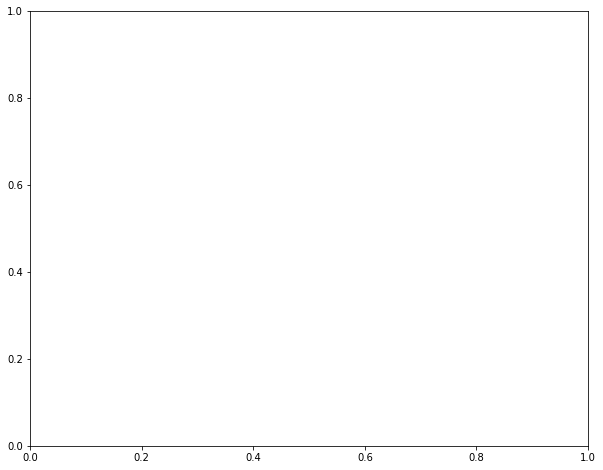

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

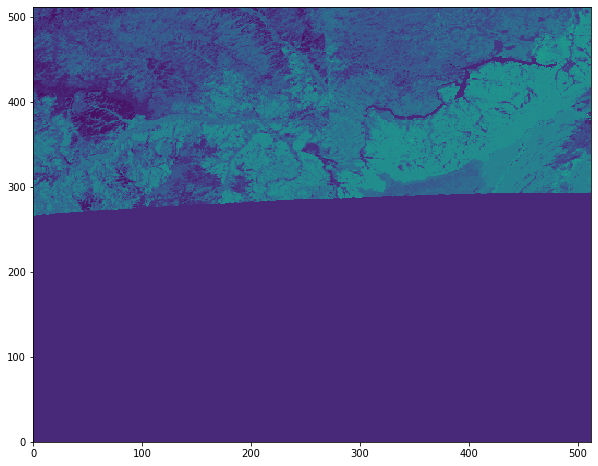

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.pcolormesh(my_array)

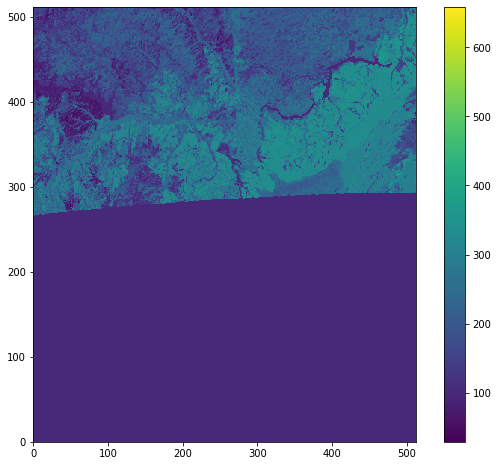

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(my_array)
fig.colorbar(mesh)

In [38]:
my_array=soil[0,4512:4512+512,4512:4512+512]

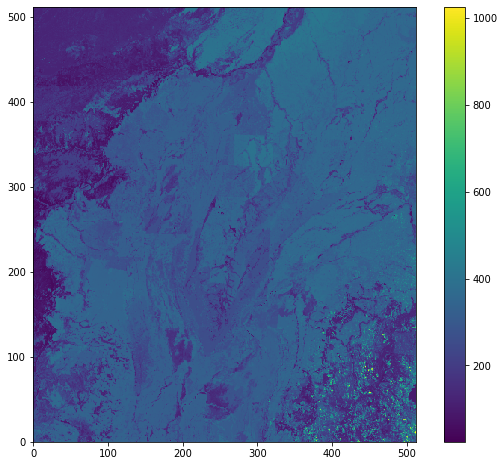

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(my_array)
fig.colorbar(mesh)

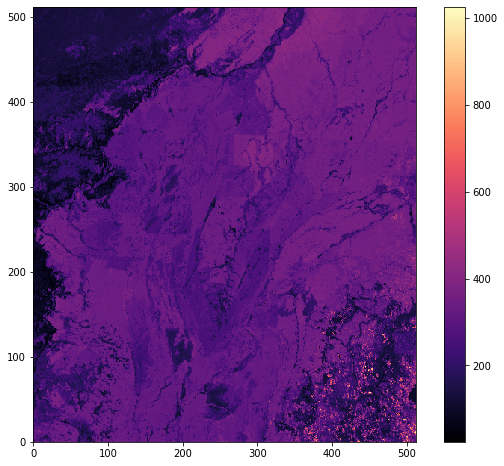

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(my_array,cmap='magma')
fig.colorbar(mesh)

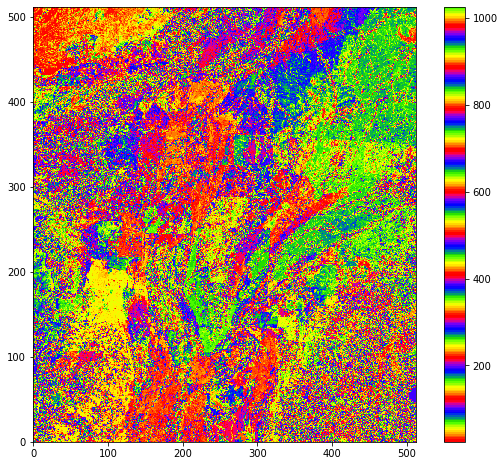

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(my_array,cmap='prism')
fig.colorbar(mesh)

In [42]:
my_array = soil[0:, 4512, 4512]
my_array

masked_array(data=[244.78821, 244.78822, 244.78821, 243.98994, 233.26355,
                   228.25345, 206.63281, 144.32893, 147.645  , 191.3132 ,
                   207.66109, 223.38188],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

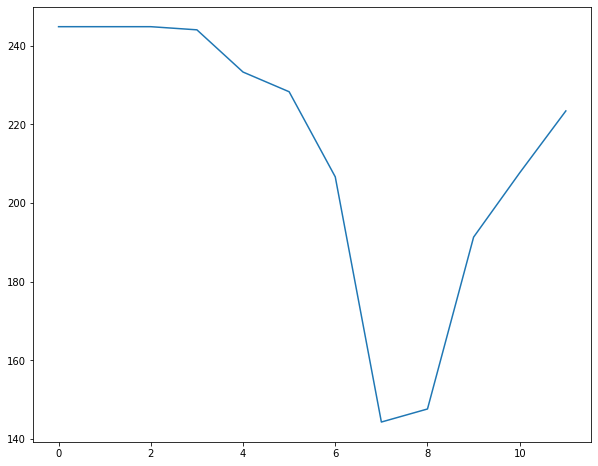

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
timeseries = ax.plot(my_array)

In [44]:
times = grid.variables['time']
times

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    long_name: time
    calendar: standard
    bounds: time_bnds
    units: months since 1980-01-01
unlimited dimensions: 
current shape = (12,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [46]:
times[0:]

masked_array(data=[ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,
                    9.5, 10.5, 11.5],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [47]:
! wget http://www.yellowstone.solutions/thredds/fileServer/daily_or_monthly/monthly/v2_2017_soil_water_monthly.nc4

--2020-03-16 21:11:24--  http://www.yellowstone.solutions/thredds/fileServer/daily_or_monthly/monthly/v2_2017_soil_water_monthly.nc4
Resolving www.yellowstone.solutions (www.yellowstone.solutions)... 34.213.214.131
Connecting to www.yellowstone.solutions (www.yellowstone.solutions)|34.213.214.131|:80... connected.
HTTP request sent, awaiting response... 200 
Length: 469884899 (448M) [application/x-netcdf4]
Saving to: ‘v2_2017_soil_water_monthly.nc4’

v2_2017_soil_water_ 100%[===================>] 448.12M  41.9MB/s    in 9.5s    

2020-03-16 21:11:33 (47.2 MB/s) - ‘v2_2017_soil_water_monthly.nc4’ saved [469884899/469884899]



In [58]:

grid = nc.Dataset('v2_2017_soil_water_monthly.nc4')

In [59]:
soil = grid.variables['soil_water']

In [60]:
pixels_2018 = my_array

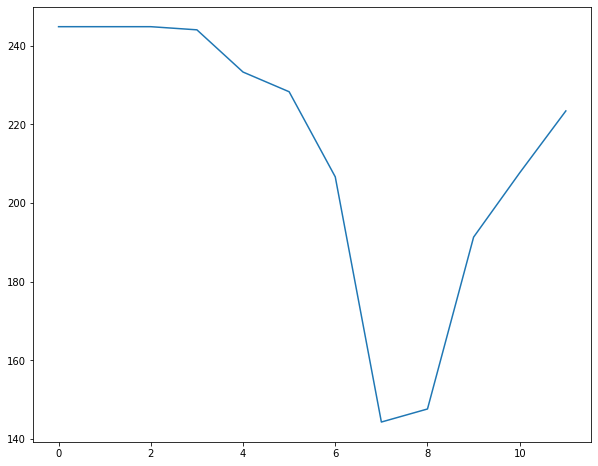

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
timeseries = ax.plot(pixels_2018)

In [62]:
my_array = soil[0:, 4512, 4512]
my_array

masked_array(data=[201.64696, 224.4578 , 244.45795, 241.75276, 223.39372,
                   163.16116,  96.81721, 108.51885, 101.53405, 101.12231,
                   103.53531, 112.7994 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

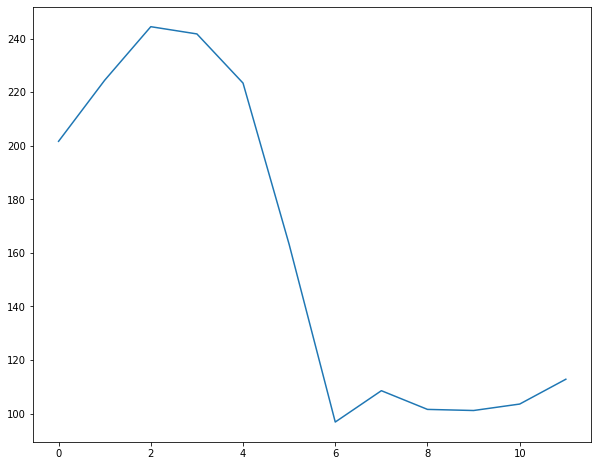

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
timeseries = ax.plot(my_array)

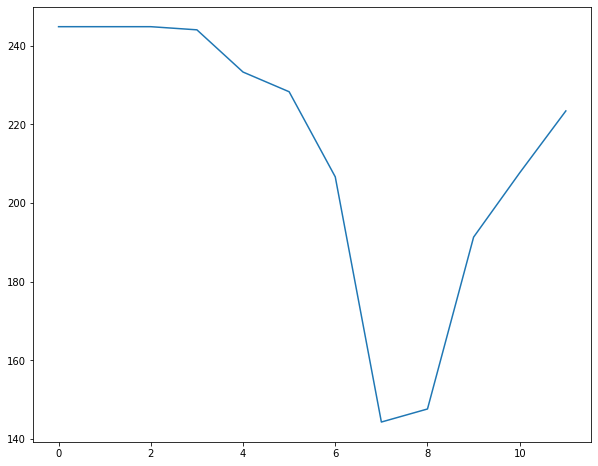

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
timeseries = ax.plot(pixels_2018)

# compare 2017 top to 2018 just above

http://www.yellowstone.solutions/thredds/catalog/daily_or_monthly/monthly/catalog.html